# **5 companies:**

Toyota Motor Corporation (TM)

Intel Corporation (INTC)

Apple Inc. (AAPL)

Autodesk, Inc. (ADSK)

RBC Bearings Incorporated (RBC)

In [93]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import scipy.io
import tensorflow as tf

from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

AAPL=pd.read_csv('AAPL.csv')
ADSK=pd.read_csv('ADSK.csv')
INTC=pd.read_csv('INTC.csv')
RBC=pd.read_csv('RBC.csv')
TM=pd.read_csv('TM.csv')

AAPLmatrix = AAPL.to_numpy()
ADSKmatrix = ADSK.to_numpy()
INTCmatrix = INTC.to_numpy()
RBCmatrix  = RBC.to_numpy()
TMmatrix   = TM.to_numpy()

In [95]:
AAPLmat = AAPLmatrix[:,1:5]   # open high low close
ADSKmat = ADSKmatrix[:,1:5]   # open high low close
INTCmat = INTCmatrix[:,1:5]   # open high low close
RBCmat  = RBCmatrix[:,1:5]    # open high low close
TMmat   = TMmatrix[:,1:5]     # open high low close

Now I flatten this data to get a one dimensional time series.

In [96]:
nTotal=1259*4
xx1=np.reshape(AAPLmat,nTotal)
xx2=np.reshape(ADSKmat,nTotal)
xx3=np.reshape(INTCmat,nTotal)
xx4=np.reshape(RBCmat,nTotal)
xx5=np.reshape(TMmat,nTotal)

Let us normalize first.

In [97]:
M1=max(xx1)
m1=min(xx1)
nxx1 = 1 + (xx1 - m1)/(M1 - m1)

M2=max(xx2)
m2=min(xx2)
nxx2 = 1 + (xx2 - m2)/(M2 - m2)

M3=max(xx3)
m3=min(xx3)
nxx3 = 1 + (xx3 - m3)/(M3 - m3)

M4=max(xx4)
m4=min(xx4)
nxx4 = 1 + (xx4 - m4)/(M4 - m4)

M5=max(xx5)
m5=min(xx5)
nxx5 = 1 + (xx5 - m5)/(M5 - m5)

mts = np.column_stack((nxx1, nxx2, nxx3, nxx4, nxx5))

In [98]:
mts = np.asarray(mts).astype('float32')

In [99]:
w=20   ### Window size of 20
NS=int(np.floor(nTotal/w*1))   #### Number of Samples

This time, we can use all 251 windows.

There are some 5036 - 5020 = 16 numbers, of which the first one could be the target for the last window.

Let us do the Target picking first.

In [100]:
zind=np.arange(w,nTotal,w)
z=mts[zind]

I get the input data from the first 5020 numbers.

In [101]:
NS=251
x=np.reshape(mts[:-16],(NS,w,5))
x=tf.convert_to_tensor(x)

In [102]:
xtrain=x[0:175,:,:]
xtest=x[175:251,:,:]
ztrain=z[0:175]
ztest=z[175:251]

In [103]:
model = Sequential()
model.add(SimpleRNN(200, input_shape=(20,5), activation='relu'))
model.add(Dense(5, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

model2 = Sequential()
model2.add(LSTM(200, input_shape=(20,5), activation='relu'))
model2.add(Dense(5, activation='linear'))
model2.compile(loss='mean_squared_error', optimizer='adam')

In [104]:
model2.fit(xtrain, ztrain, epochs=20, batch_size=1, verbose=2)
model.fit(xtrain, ztrain, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
175/175 - 3s - loss: 0.0770 - 3s/epoch - 19ms/step
Epoch 2/20
175/175 - 2s - loss: 0.0153 - 2s/epoch - 9ms/step
Epoch 3/20
175/175 - 2s - loss: 0.0078 - 2s/epoch - 9ms/step
Epoch 4/20
175/175 - 2s - loss: 0.0064 - 2s/epoch - 9ms/step
Epoch 5/20
175/175 - 2s - loss: 0.0048 - 2s/epoch - 9ms/step
Epoch 6/20
175/175 - 2s - loss: 0.0045 - 2s/epoch - 9ms/step
Epoch 7/20
175/175 - 2s - loss: 0.0044 - 2s/epoch - 9ms/step
Epoch 8/20
175/175 - 2s - loss: 0.0035 - 2s/epoch - 11ms/step
Epoch 9/20
175/175 - 2s - loss: 0.0035 - 2s/epoch - 10ms/step
Epoch 10/20
175/175 - 2s - loss: 0.0032 - 2s/epoch - 9ms/step
Epoch 11/20
175/175 - 2s - loss: 0.0024 - 2s/epoch - 9ms/step
Epoch 12/20
175/175 - 2s - loss: 0.0022 - 2s/epoch - 9ms/step
Epoch 13/20
175/175 - 2s - loss: 0.0022 - 2s/epoch - 9ms/step
Epoch 14/20
175/175 - 2s - loss: 0.0032 - 2s/epoch - 9ms/step
Epoch 15/20
175/175 - 2s - loss: 0.0022 - 2s/epoch - 10ms/step
Epoch 16/20
175/175 - 2s - loss: 0.0020 - 2s/epoch - 11ms/step
Epoch 17/20


In [105]:
xpredicted=model.predict(xtest)
xpredicted2=model2.predict(xtest)

3/3 [==============================] - 0s 6ms/step


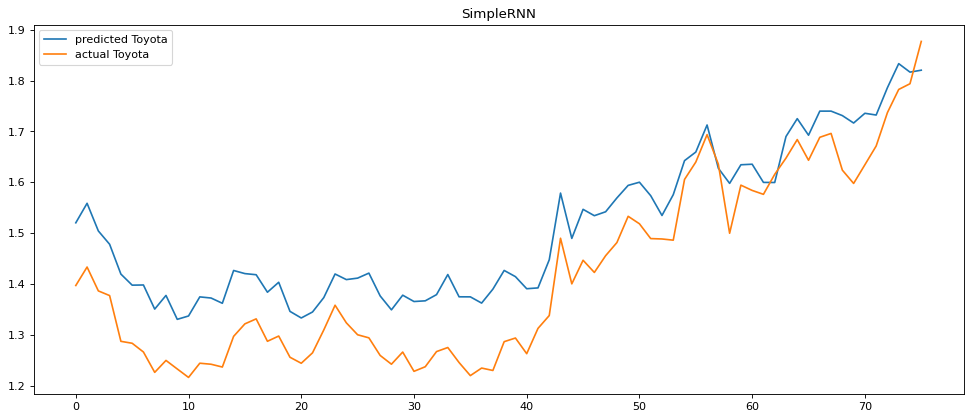

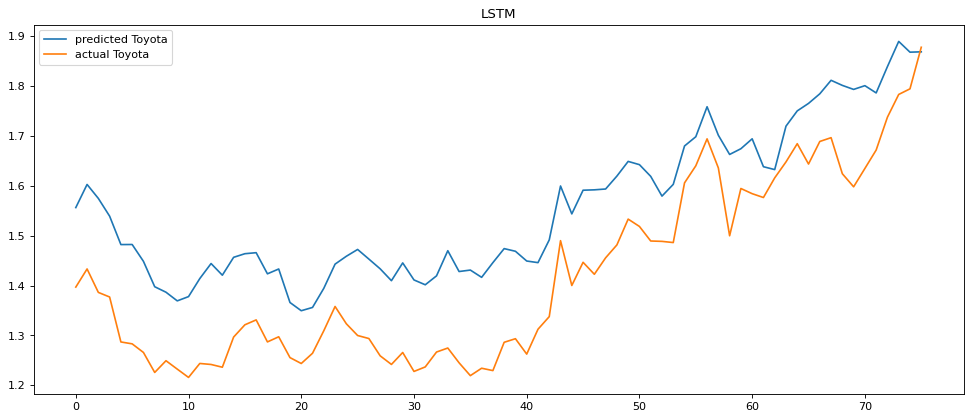

In [106]:
plt.figure(figsize=(15, 6), dpi=80)

plt.plot(range(76), xpredicted[:,4], label='predicted Toyota'.format(1))
plt.plot(range(76), ztest[:,4], label='actual Toyota'.format(2))

plt.legend(loc='best')
plt.title('SimpleRNN')
plt.show()

plt.figure(figsize=(15, 6), dpi=80)

plt.plot(range(76), xpredicted2[:,4], label='predicted Toyota'.format(1))
plt.plot(range(76), ztest[:,4], label='actual Toyota'.format(2))

plt.legend(loc='best')
plt.title('LSTM')
plt.show()